### Data information

- LCD (Largest Cavity Diameter)
- PLD (Pore Limiting Diameter)
- LFPD (Largest Sphere along the Free Path)
- ASA (Accessible Surface Area)
- NASA (Non-accessible Surface Area)
- AV_VF (Void Fraction, 0-1)
- NAV (Non Accessible Volume)

### Drop by default
( Metadata )

- Extension
- FSR_overlap
- from_CSD
- public
- DISORDER
- CSD_overlap_inCoRE
- CSD_of_WoS_inCoRE
- CSD_overlap_inCCDC
- date_CSD
- DOI_public
- Note
- Matched_CSD_of_CoRE
- Possible_List_CSD_of_CoRE
- Open_Metal_Sites (Duplicate)

What to do with metals labeled as charged/manual/clean?

How should categorical columns such as All_metals and OMS be handeled? Intuitively it feels like they would be counter-productive to the fitting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Load dataset

df = pd.read_csv('../data/2019-11-01-ASR-internal_14142.csv')
df.head(5)

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,ABAVIJ_clean,4.45543,2.49720,4.40652,1.524930,0.00,0.000,312.052,204.6330,0.3792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABAVOP_clean,3.53642,2.44162,3.53007,1.565940,0.00,0.000,122.782,78.4079,0.3782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABAYIO_clean,11.39486,4.32260,11.27409,0.949126,1428.73,1505.310,409.494,431.4440,0.6636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABAYOU_clean,11.27344,4.51080,11.27344,0.979267,1463.42,1494.400,419.062,427.9350,0.6638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABEFUL_clean,4.93969,3.32948,4.93889,1.551080,418.49,269.806,0.000,0.0000,0.4118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns.shape[0]

42

In [24]:
# Drop columns that start with "Unnamed"
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

# Drop metadata columns
metadata_columns = [
    "Extension",
    "FSR_overlap",
    "from_CSD",
    "public",
    "DISORDER",
    "CSD_overlap_inCoRE",
    "CSD_of_WoS_inCoRE",
    "CSD_overlap_inCCDC",
    "date_CSD",
    "DOI_public",
    "Note",
    "Matched_CSD_of_CoRE",
    "Possible_List_CSD_of_CoRE",
    "Has_OMS"
]

df = df.drop(columns=metadata_columns)

# Display the first 5 rows of the modified DataFrame
df.head(5)

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,AV_cm3_g,NAV_cm3_g,All_Metals,Open_Metal_Sites
0,ABAVIJ_clean,4.45543,2.49720,4.40652,1.524930,0.00,0.000,312.052,204.6330,0.3792,0.248667,0.0,Co,
1,ABAVOP_clean,3.53642,2.44162,3.53007,1.565940,0.00,0.000,122.782,78.4079,0.3782,0.241516,0.0,Co,
2,ABAYIO_clean,11.39486,4.32260,11.27409,0.949126,1428.73,1505.310,409.494,431.4440,0.6636,0.699170,0.0,Mn,
3,ABAYOU_clean,11.27344,4.51080,11.27344,0.979267,1463.42,1494.400,419.062,427.9350,0.6638,0.677854,0.0,Co,
4,ABEFUL_clean,4.93969,3.32948,4.93889,1.551080,418.49,269.806,0.000,0.0000,0.4118,0.265493,0.0,Tb,


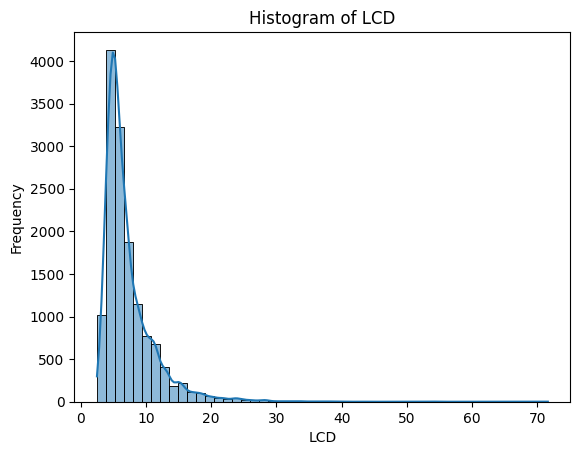

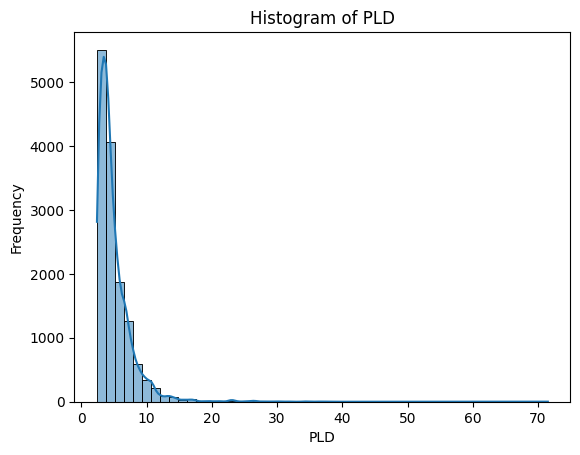

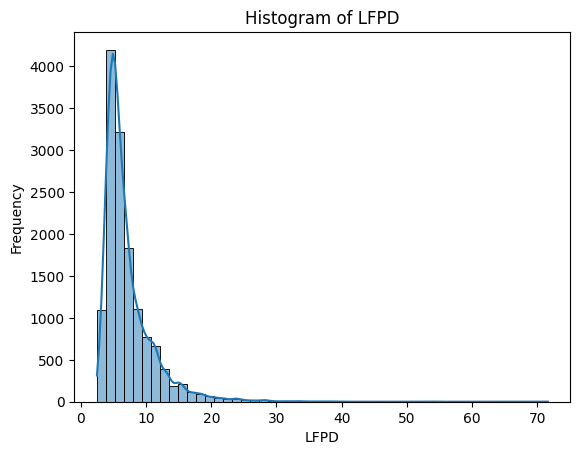

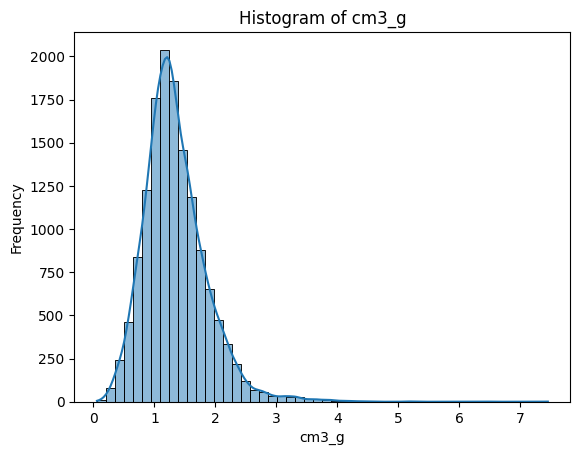

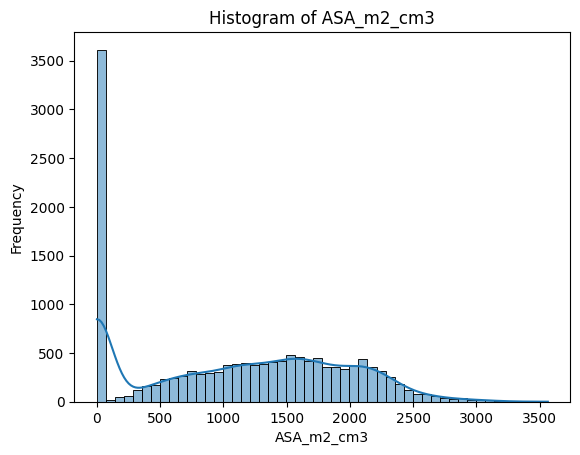

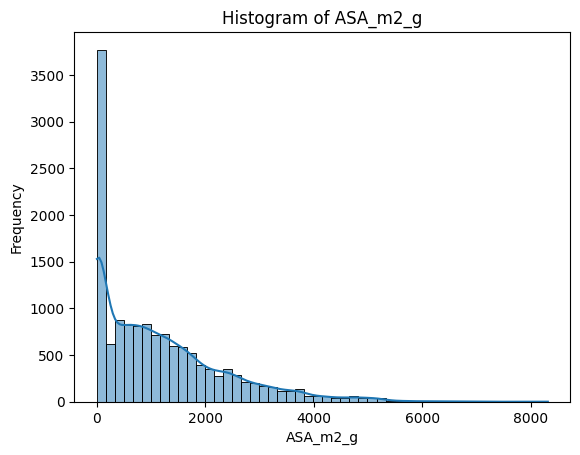

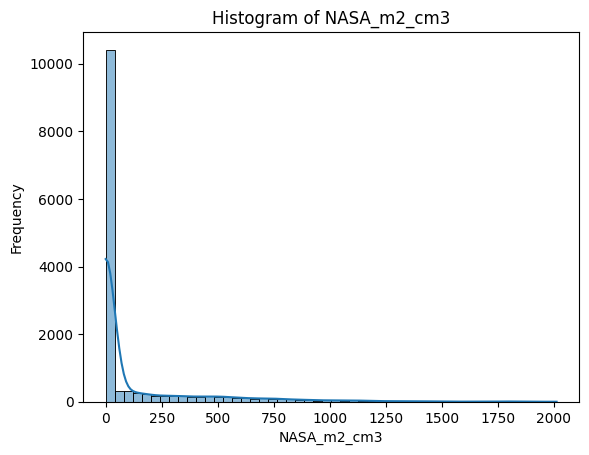

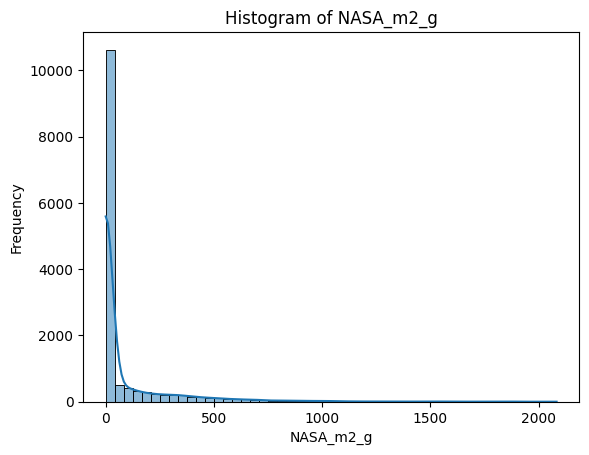

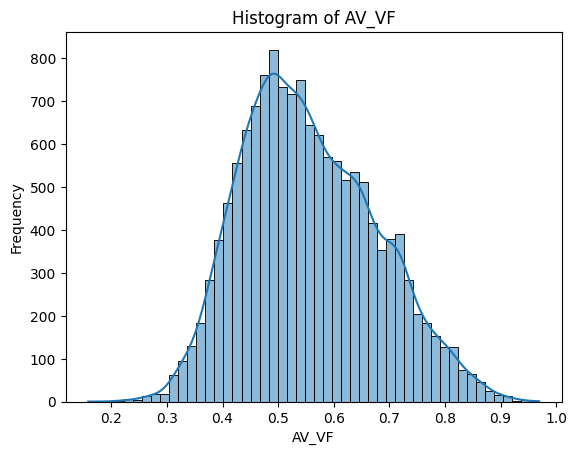

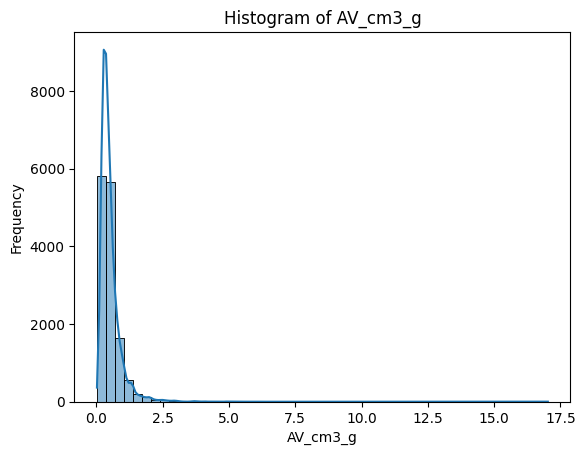

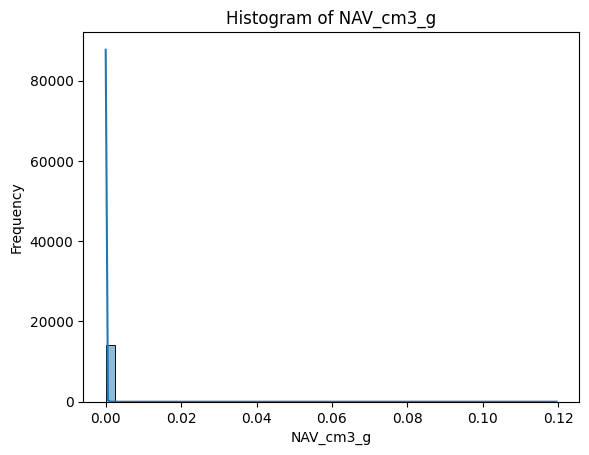

In [25]:
# Generate and display the histogram for the specified column
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Generate and display a histogram for each numerical column using Seaborn
for column in numerical_columns:
    plt.figure()
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

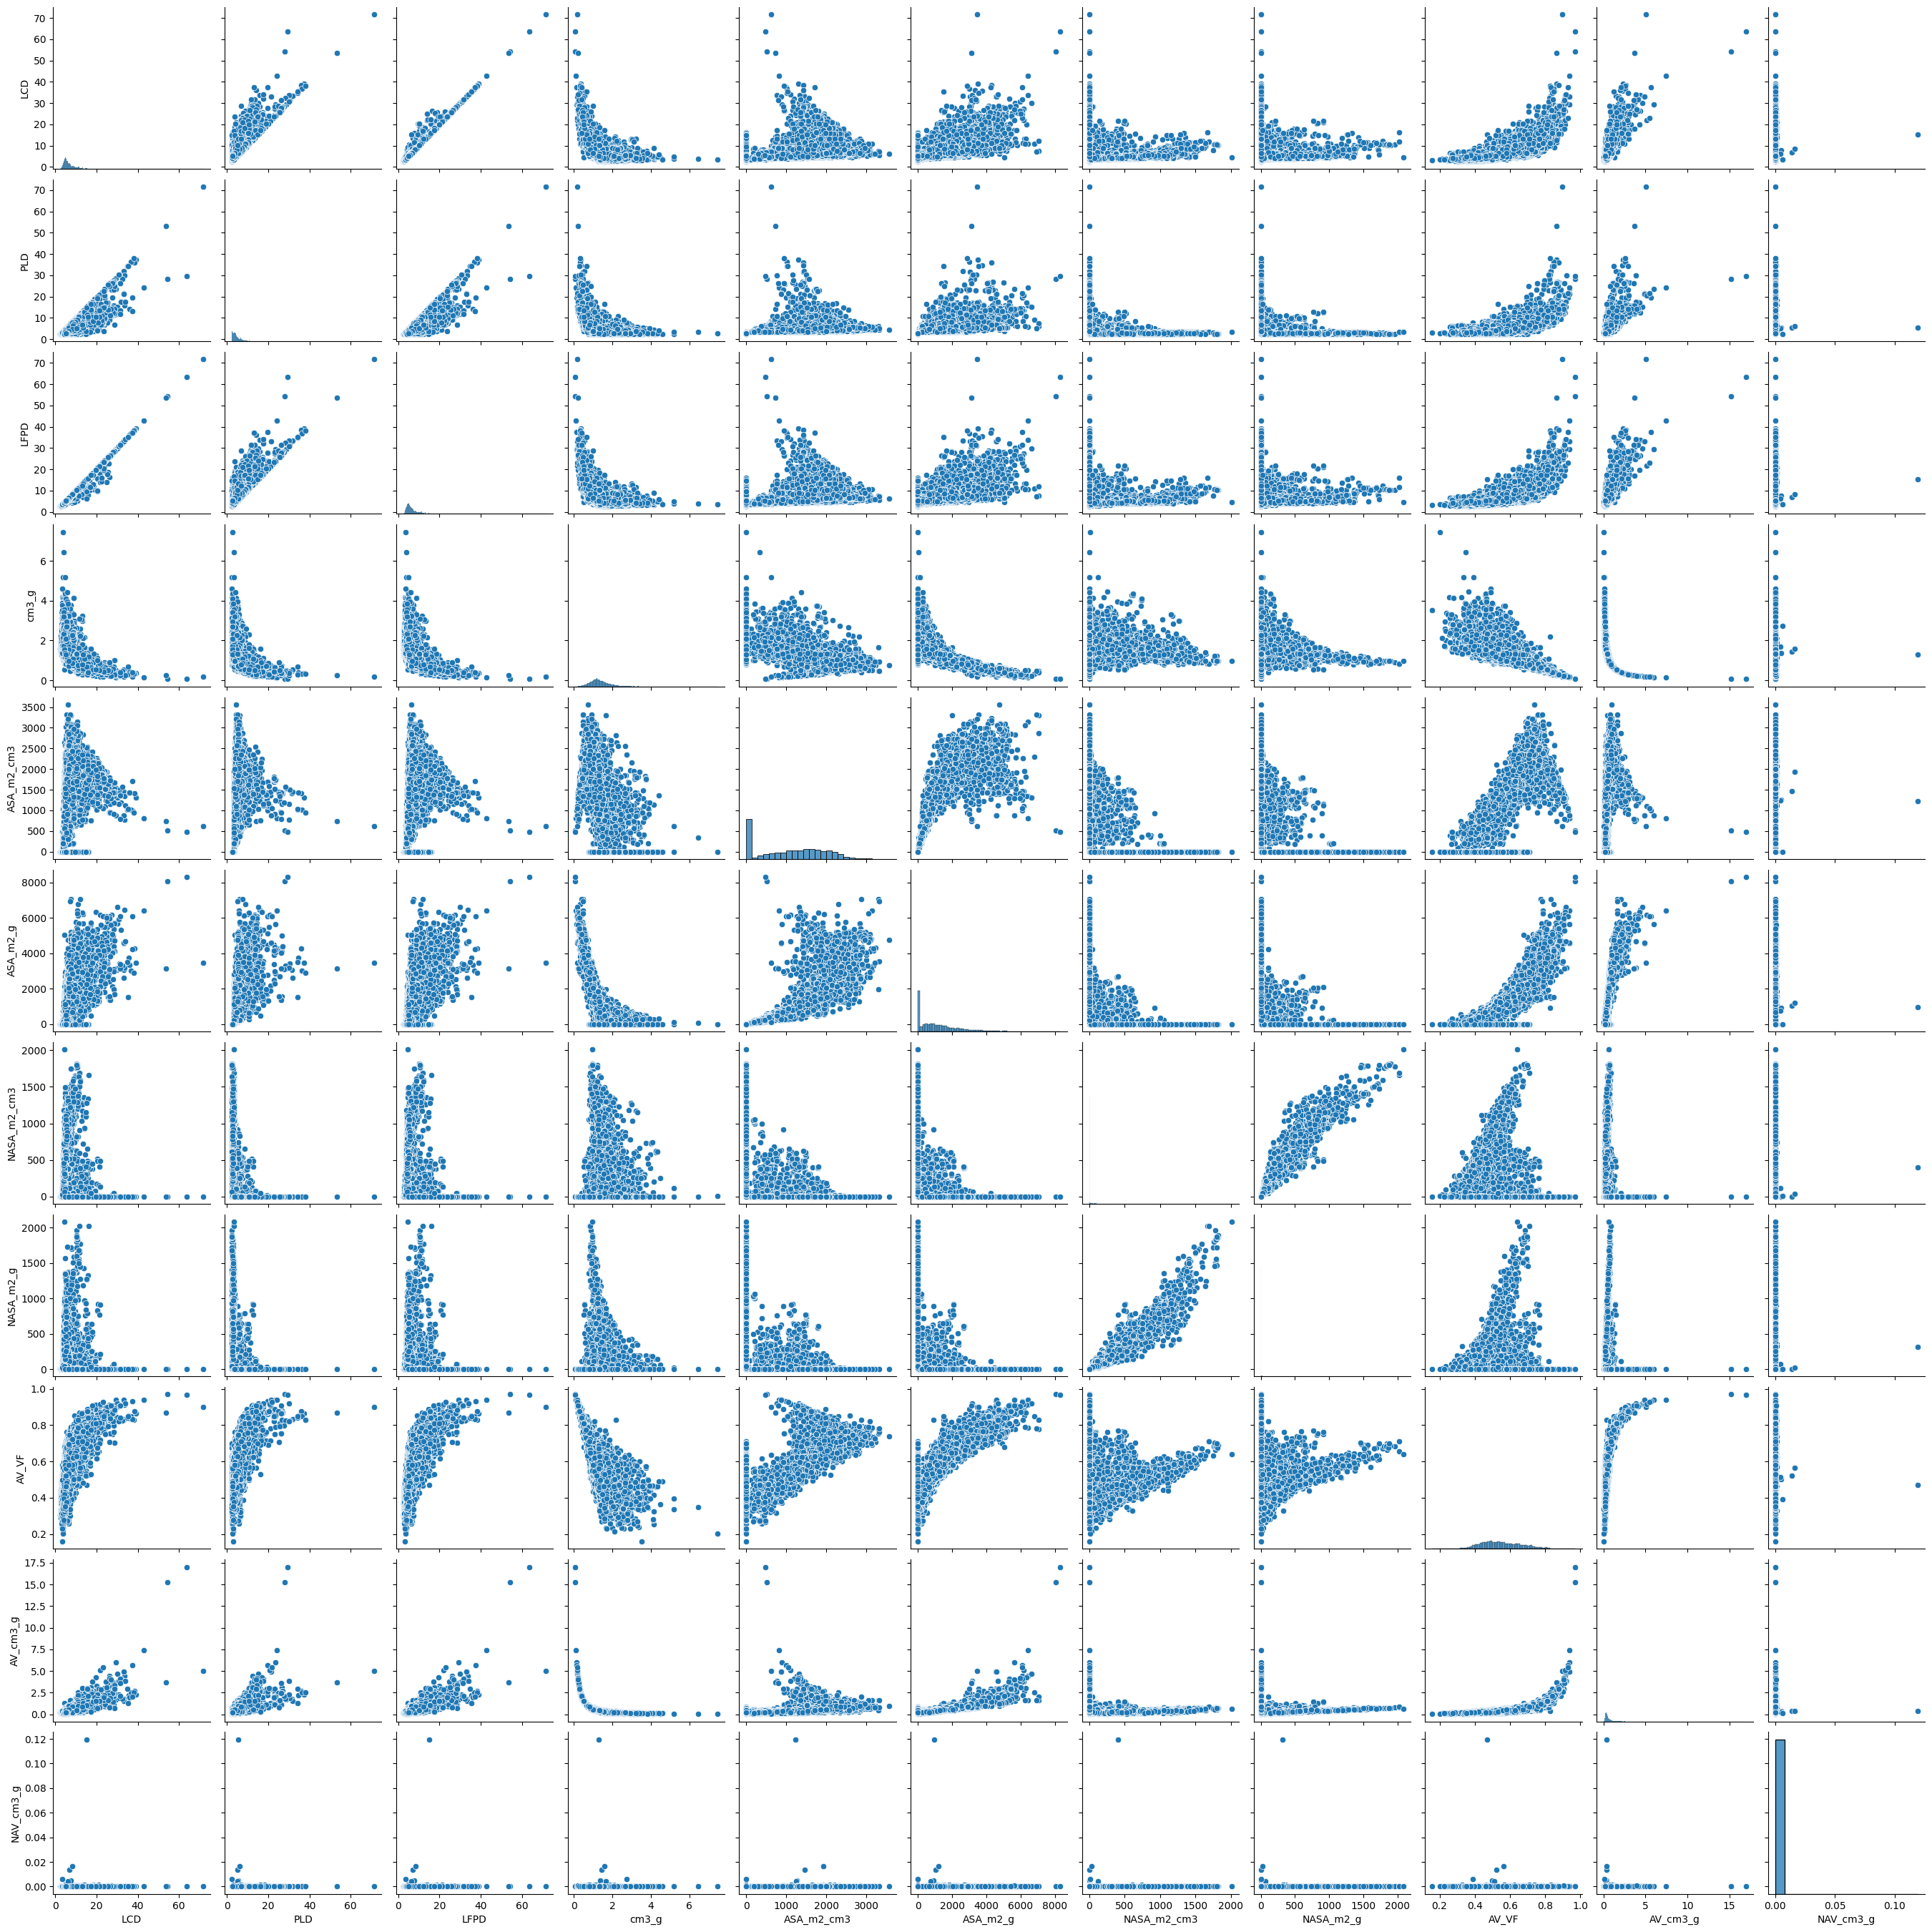

In [26]:
# Create a pairplot of the numerical columns
sns.pairplot(df[numerical_columns])
plt.show()